La tarea consiste en <font color="red">2</font> partes:

<font color="blue">**Primera parte**</font><br>
Utilizar la base de datos OnlineRetail.csv para responder lo siguiente:<br>
- 1. Graficar la cantidad de ordenes (Invoice) por cada día de la semana. ¿Qué
día se producen la mayor cantidad de ordenes y cuando la menor?
- 2. ¿Cuales son los 5 países que más gastan en promedio? graficar y tabla
- 3. Hay items que la empresa entrega de regalo, ¿Cuantos se regalaron?.
indicar cantidad por mes.

<font color="blue">**Segunda parte consiste en:**</font><br>
Utilizando SegmentationData.csv
1. Obtener la solución de cluster jerárquico para k = 4 y con ella:
-  Poner nombre a los 4 clusters
- Realizar crosstab (con MBA y Choice)
- Calcular el test de chi-cuadrado (pearson) para los crosstab
(MBA y Choice) con el fin de responder si existe relación entre
las variables. ( alfa = 0.05)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'arrestosUSA.csv',
 'brandrating.csv',
 'Clase 3 18-08-22 Cluster K media .ipynb',
 'Clase 3 18_08-22 Cluster K-prototype.ipynb',
 'Clase 4 PCA 23-08-22.ipynb',
 'Clase 5 25-08-22 Reglas de Asociación.ipynb',
 'class KPrototypes.pdf',
 'Cluster jerarquicos.pdf',
 'Cluster No jerarquicos.pdf',
 'Clustering Large Data Sets with Categorical Values.pdf',
 'CollegeUSA.csv',
 'EDA Segmentacion.pdf',
 'groceries.csv',
 'Hands-On Exploratory Data Analysis with Python Perform EDA techniques to understand, summarize, and investigate your data by Suresh Kumar Mukhiya, Usman Ahmed (z-lib.org).pdf',
 'OnlineRetail.csv',
 'PCA vs FA.pdf',
 'Reducción de dimensiones.pdf',
 'Reglas de asociación.pdf',
 'SegmentationData.csv',
 'Tarea 1, Modulo 4. Matias Obaid.ipynb',
 'Tarea 2 PCA.pdf',
 'Tarea 2, Modulo 4, Matias Obaid.ipynb']

In [3]:
df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Missing_Percent'])
missing_data.head(20)

,Total_Missing,Missing_Percent
CustomerID,135080,0.249267
Description,1454,0.002683
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [11]:
df.CustomerID= df.CustomerID.astype("str")

In [12]:
df = df.dropna(axis=0)

# <font color="blue" size="7">PARTE 1</font>

<font color="green">**1. Graficar la cantidad de ordenes (Invoice) por cada día de la semana. ¿Qué día se producen la mayor cantidad de ordenes y cuando la menor?**</font>

In [13]:
sns.set_style("darkgrid")

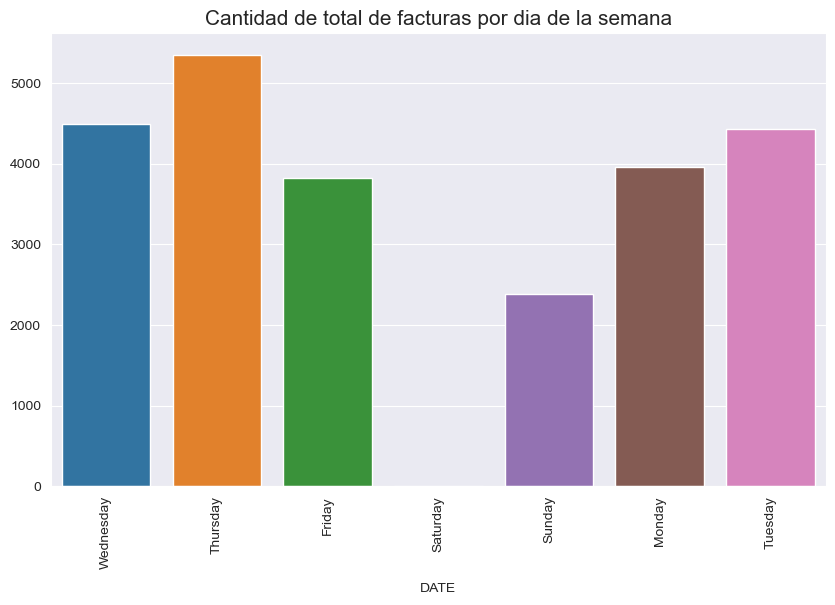

In [14]:
datas = df.groupby("InvoiceNo", as_index=False).first().set_index("InvoiceDate").resample("D").count()["InvoiceNo"]

plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x=datas.index.strftime('%A'),y=datas.values, estimator=np.sum, ci=None)
plt.xticks(rotation=90);
plt.title("Cantidad de total de facturas por dia de la semana", fontsize=15)
plt.xlabel(xlabel="DATE", labelpad=10);

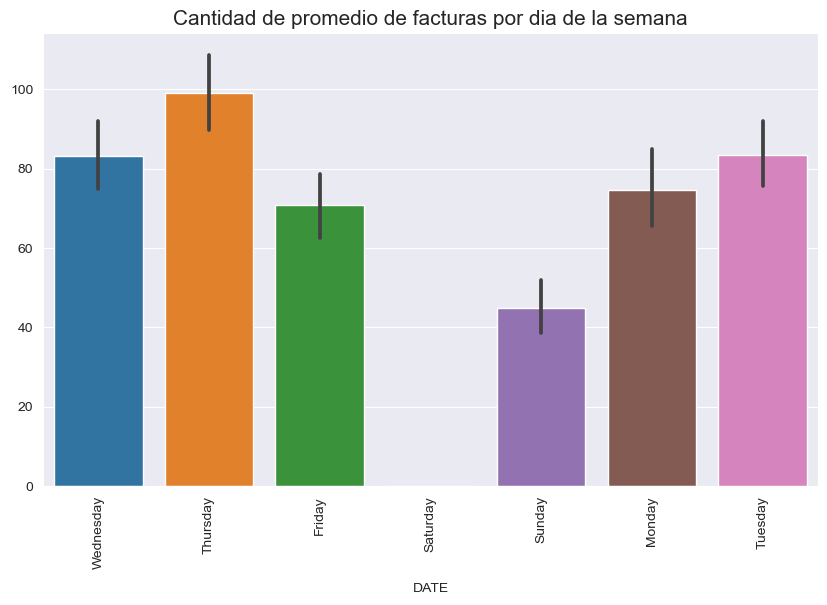

In [15]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x=datas.index.strftime('%A'),y=datas.values, estimator=np.mean)
plt.xticks(rotation=90);
plt.title("Cantidad de promedio de facturas por dia de la semana", fontsize=15)
plt.xlabel(xlabel="DATE", labelpad=10);

In [16]:
datas = pd.DataFrame(datas)
datas["weekday"] = datas.index.day_name()

In [17]:
# Total de cantidad de facturas por dia de la semana en el dataset.
datas.groupby("weekday").sum().sort_values(by="InvoiceNo",ascending=False)

,InvoiceNo
weekday,
Thursday,5353
Wednesday,4496
Tuesday,4430
Monday,3960
Friday,3826
Sunday,2381
Saturday,0


**El dia con la Mayor Cantidad de ordenes es el "Jueves" (Thursday), el dia con la menor cantidad de ordenes es el Sabado (Saturday), Aparentemente esta cerrado ese dia.**

<font color="green">**2. ¿Cuales son los 5 países que más gastan en promedio? graficar y tabla**</font>

In [18]:
df["Amount_spent"] = df["UnitPrice"] * df["Quantity"]

**Paises que mas gastan en promedio <font color="red"> POR FACTURA (InvoiceNo unico)**</font>

In [19]:
fac = pd.DataFrame(df.groupby(["InvoiceNo","Country"]).mean()["Amount_spent"]
             .groupby("Country").mean().sort_values(ascending=False)).round(2).head(5)

fac

,Amount_spent
Country,
Japan,312.60
Canada,190.99
Netherlands,175.29
Australia,84.68
Finland,55.90


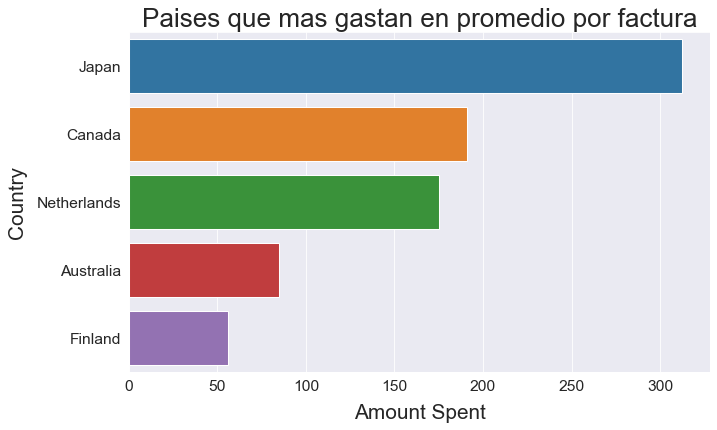

In [20]:
plt.figure(figsize=(10,6),dpi=75)
sns.barplot(x=fac.Amount_spent,y=fac.index, orient="h", estimator=np.mean)
plt.title("Paises que mas gastan en promedio por factura", fontsize=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(xlabel="Amount Spent", labelpad=10, size=20)
plt.ylabel(ylabel="Country", labelpad=10, size=20);

**Paises que mas gastan en promedio <font color="red"> POR ITEMS** (rows/filas)</font>

In [21]:
prod = pd.DataFrame(df.groupby("Country").mean()["Amount_spent"].sort_values(ascending=False)).round(2).head(5)
prod

,Amount_spent
Country,
Netherlands,120.06
Australia,108.88
Japan,98.72
Sweden,79.21
Denmark,48.25


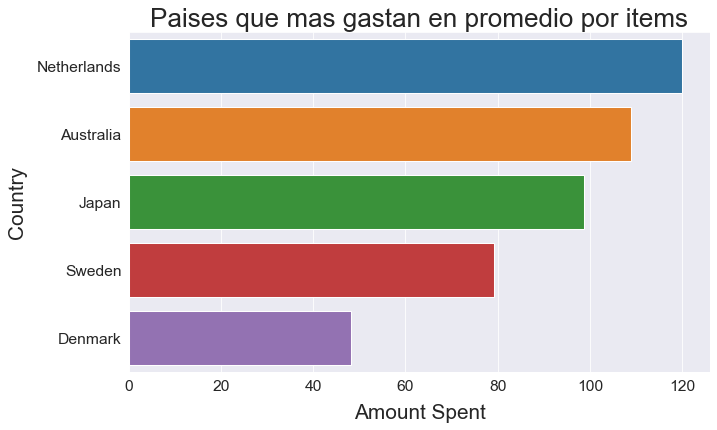

In [22]:
plt.figure(figsize=(10,6),dpi=75)
sns.barplot(x=prod.Amount_spent,y=prod.index, orient="h", estimator=np.mean)
plt.title("Paises que mas gastan en promedio por items", fontsize=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(xlabel="Amount Spent", labelpad=10, size=20)
plt.ylabel(ylabel="Country", labelpad=10, size=20);

<font color="green">**3. Hay items que la empresa entrega de regalo, ¿Cuantos se regalaron?.
indicar cantidad por mes.**</font>


Asumire que "regalos" se refieren a productos que tienen "UnitPrice" 0 y "Quantity" >=1.

In [23]:
gifts = df[(df["UnitPrice"]==0) & (df["Quantity"]>=1)].groupby("InvoiceDate").sum()

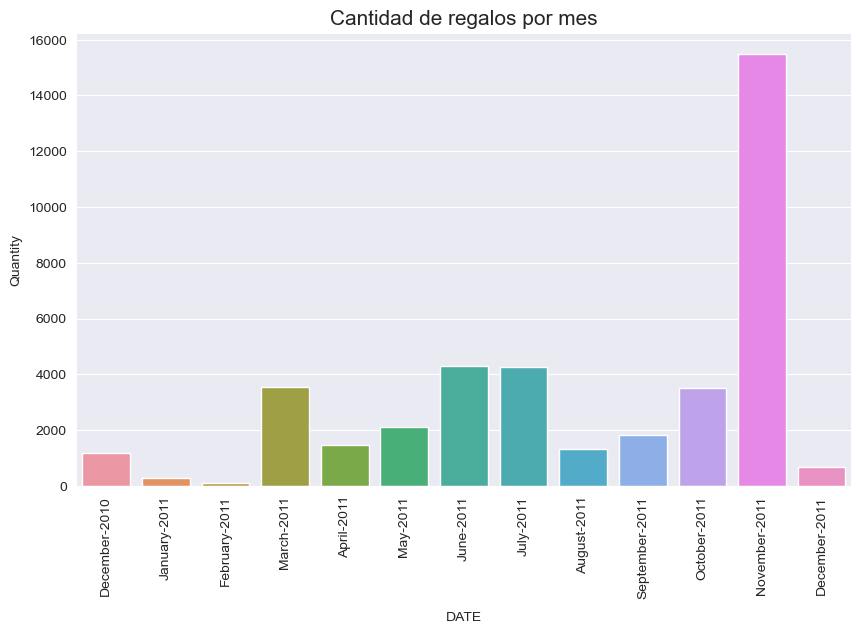

In [24]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x=gifts.index.strftime('%B-%Y'),y=gifts["Quantity"], ci=None, estimator=np.sum)
plt.xticks(rotation=90);
plt.title("Cantidad de regalos por mes", fontsize=15)
plt.xlabel(xlabel="DATE", labelpad=10);

In [25]:
gifts = gifts.resample("M").sum()
gifts["Mes"] = gifts.index.month_name()
gifts[["Quantity","Mes"]]

,Quantity,Mes
InvoiceDate,,
2010-12-31,1192,December
2011-01-31,267,January
2011-02-28,107,February
2011-03-31,3559,March
2011-04-30,1465,April
2011-05-31,2100,May
2011-06-30,4313,June
2011-07-31,4246,July
2011-08-31,1308,August


# <font color="blue" size="7">PARTE 2</font>

1. Obtener la solución de cluster jerárquico para k = 4 y con ella:
-  Poner nombre a los 4 clusters
- Realizar crosstab (con MBA y Choice)
- Calcular el test de chi-cuadrado (pearson) para los crosstab
(MBA y Choice) con el fin de responder si existe relación entre
las variables. ( alfa = 0.05)

In [26]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy import stats

In [27]:
data = pd.read_csv("SegmentationData.csv")

In [28]:
data.head()

,ID,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,MBA,Choice
0,1,10,20,35,5,20,10,MBA,Lexus
1,2,25,5,25,5,25,15,MBA,BMW
2,3,10,20,30,10,10,20,MBA,Lexus
3,4,10,15,30,10,20,15,MBA,BMW
4,5,20,10,40,1,14,15,MBA,Mercedes


In [29]:
scaler = StandardScaler()

In [30]:
scaled_data = scaler.fit_transform(data.select_dtypes(exclude="object"))

In [31]:
scaled_data = pd.DataFrame(scaled_data, columns=data.select_dtypes(exclude="object").columns).drop("ID",axis=1)
scaled_data

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort
0,-0.689164,0.499143,1.777941,-1.171735,0.086045,-1.114841
1,1.448611,-1.930019,0.357922,-1.171735,0.833813,-0.084671
2,-0.689164,0.499143,1.067932,-0.184014,-1.409493,0.945498
3,-0.689164,-0.310578,1.067932,-0.184014,0.086045,-0.084671
4,0.736019,-1.120299,2.487950,-1.961912,-0.811278,-0.084671
...,...,...,...,...,...,...
68,0.450983,0.175255,-0.494089,0.803707,-0.362617,-0.496739
69,0.736019,1.308864,-1.062096,-0.184014,-0.661724,-0.084671
70,0.023428,-0.310578,-0.352087,-0.184014,0.833813,-0.084671
71,-0.689164,2.118585,-0.352087,-1.171735,0.086045,-0.084671


In [32]:
link = linkage(scaled_data,'ward')

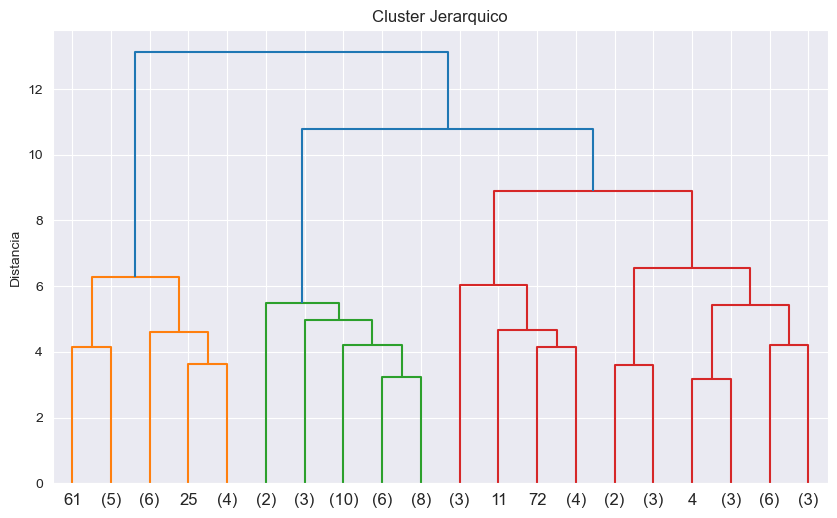

In [33]:
plt.figure(figsize=(10,6),dpi=100)
dendrogram(link,p=20,truncate_mode="lastp")
plt.title('Cluster Jerarquico')
plt.ylabel('Distancia');

In [34]:
labels = fcluster(link, 8, criterion='distance')
labels

array([4, 4, 2, 4, 4, 1, 2, 4, 4, 3, 4, 3, 2, 1, 4, 2, 1, 4, 2, 1, 4, 2,
       4, 4, 2, 1, 2, 1, 4, 2, 3, 1, 4, 1, 3, 2, 4, 2, 2, 3, 2, 4, 3, 4,
       1, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 4, 3, 3], dtype=int32)

In [35]:
scaled_data["Cluster"] = labels

In [36]:
scaled_data.head()

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort,Cluster
0,-0.689164,0.499143,1.777941,-1.171735,0.086045,-1.114841,4
1,1.448611,-1.930019,0.357922,-1.171735,0.833813,-0.084671,4
2,-0.689164,0.499143,1.067932,-0.184014,-1.409493,0.945498,2
3,-0.689164,-0.310578,1.067932,-0.184014,0.086045,-0.084671,4
4,0.736019,-1.120299,2.487950,-1.961912,-0.811278,-0.084671,4


In [37]:
group_cluster = scaled_data.groupby(['Cluster']).mean()
group_cluster

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort
Cluster,,,,,,
1,1.155191,0.861136,-0.661150,0.164594,-0.925642,-0.702773
2,-0.015888,-0.427848,-0.283534,0.503985,-0.099608,0.590267
3,-1.116719,1.128926,-0.052305,-0.030368,0.750728,-0.748559
4,-0.507057,-0.688448,1.107377,-0.952241,0.659334,0.087023


In [38]:
cluster = {1: 'Imagen y estilo', 2:'Deportivo Comodo', 3:'Rendimiento y velocidad', 4:"Ejecutivo"}

In [39]:
scaled_data = scaled_data.replace({'Cluster': cluster})

In [40]:
group_cluster = scaled_data.groupby(['Cluster']).mean()
group_cluster

,Trendy,Styling,Reliability,Sportiness,Performance,Comfort
Cluster,,,,,,
Deportivo Comodo,-0.015888,-0.427848,-0.283534,0.503985,-0.099608,0.590267
Ejecutivo,-0.507057,-0.688448,1.107377,-0.952241,0.659334,0.087023
Imagen y estilo,1.155191,0.861136,-0.661150,0.164594,-0.925642,-0.702773
Rendimiento y velocidad,-1.116719,1.128926,-0.052305,-0.030368,0.750728,-0.748559


In [41]:
pd.crosstab(data.MBA, scaled_data.Cluster,margins=False)

Cluster,Deportivo Comodo,Ejecutivo,Imagen y estilo,Rendimiento y velocidad
MBA,,,,
MBA,6,12,4,2
Undergrad,23,6,13,7


In [42]:
pd.crosstab(data.MBA, scaled_data.Cluster, margins=False, normalize='index')

Cluster,Deportivo Comodo,Ejecutivo,Imagen y estilo,Rendimiento y velocidad
MBA,,,,
MBA,0.250000,0.500000,0.166667,0.083333
Undergrad,0.469388,0.122449,0.265306,0.142857


In [43]:
pd.crosstab(data.Choice, scaled_data.Cluster, margins=False)

Cluster,Deportivo Comodo,Ejecutivo,Imagen y estilo,Rendimiento y velocidad
Choice,,,,
BMW,10,8,8,6
Lexus,8,9,5,0
Mercedes,11,1,4,3


In [44]:
pd.crosstab(data.Choice, scaled_data.Cluster, margins=False,normalize='index')

Cluster,Deportivo Comodo,Ejecutivo,Imagen y estilo,Rendimiento y velocidad
Choice,,,,
BMW,0.312500,0.250000,0.250000,0.187500
Lexus,0.363636,0.409091,0.227273,0.000000
Mercedes,0.578947,0.052632,0.210526,0.157895


<font color="blue">**Chi2 Tests**</font>

In [45]:
f_obs = pd.crosstab(data.MBA, scaled_data.Cluster,margins=False).values
f_obs

array([[ 6, 12,  4,  2],
       [23,  6, 13,  7]], dtype=int64)

P-value es menor a 0.05, existe una relacion significativa entre MBA y Cluster, sin embargo es cuestionable ya que no contamos con suficientes grados de libertad para sostener dicha afirmacion.

In [46]:
pd.DataFrame(stats.chi2_contingency(f_obs)[0:3],index=["Chi2 (T-statistic)","P-value","Degrees of Freedom"])

,0
Chi2 (T-statistic),12.400752
P-value,0.006129
Degrees of Freedom,3.000000


In [47]:
f_obs = pd.crosstab(data.Choice, scaled_data.Cluster, margins=False).values
f_obs

array([[10,  8,  8,  6],
       [ 8,  9,  5,  0],
       [11,  1,  4,  3]], dtype=int64)

P-value es mayor a 0.05, No existe una relacion significativa entre Choice y Cluster, en mi parecer seguimos teniendo pocos grados de libertad para respaldar esto. considerando aparte que 0.073 esta bastante cerca de 0.05

In [48]:
pd.DataFrame(stats.chi2_contingency(f_obs)[0:3],index=["Chi2 (T-statistic)","P-value","Degrees of Freedom"])

,0
Chi2 (T-statistic),11.527615
P-value,0.073376
Degrees of Freedom,6.000000
